Import the libraries and load the dataset

In [ ]:
import keras
import datetime
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Load  the dataset

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

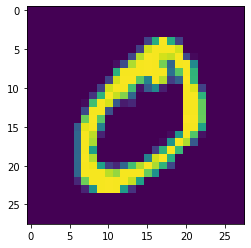

0


In [ ]:
plt.imshow(x_train[1])
plt.show()
print(y_train[1])

In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


Preprocess the data

In [ ]:
# reshape the dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
#convert class vectors to binary class matrices(One hot label)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

Create the model

In [ ]:
batch_size = 128
num_classes = 10
epochs = 3

# model creation
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


Compile the model

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# Enable histogram computation for every epoch.
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1)

Train the model

In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test), callbacks=tensorboard_callback)
print("The model has successfully trained")

Epoch 1/3
469/469 [==============================] - 179s 381ms/step - loss: 0.1957 - accuracy: 0.9396 - val_loss: 0.0489 - val_accuracy: 0.9831
Epoch 2/3
469/469 [==============================] - 175s 373ms/step - loss: 0.0659 - accuracy: 0.9796 - val_loss: 0.0369 - val_accuracy: 0.9876
Epoch 3/3
469/469 [==============================] - 178s 380ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0287 - val_accuracy: 0.9906
The model has successfully trained


Model Evaluation

In [ ]:
metrics = model.evaluate(x_test, y_test, verbose=1)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

313/313 [==============================] - 11s 35ms/step - loss: 0.0287 - accuracy: 0.9906
Metrics(Test loss & Test Accuracy):
[0.02869216538965702, 0.9905999898910522]


Predication of the trained model

1/1 [==============================] - 0s 126ms/step
Prediction (Softmax) from the neural network:

 [[2.54436072e-09 1.65337273e-08 1.01179944e-08 1.62361488e-07
  1.11680718e-04 5.97350663e-07 1.04673346e-10 1.63151608e-08
  1.11410036e-05 9.99876380e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


--------- Prediction --------- 




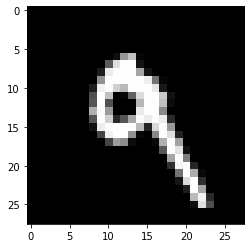



Final Output: 9


In [ ]:
example = x_test[7]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))